In [2]:
import keras
import numpy as np
import pandas as pd
from vis.visualization import visualize_cam
import cv2
import keras.backend as K
from leaky_unit import ProportionalAddition
from build_prop_model import build_model_prop as bmp


Using TensorFlow backend.


In [16]:
def create_cam(model_path, imgpath, task):
    if model_path.split('/')[-1][0] == 'p':
        model = bmp( ['gender', 'ethnicity'], int(model_path.split('/')[-1][4]))
        model.load_weights(model_path)
    else:
        model = keras.models.load_model(model_path)

    gender_model = keras.models.Model(inputs=model.input, outputs=model.get_layer(task).output)

    import matplotlib.pyplot as plt
    img1 = plt.imread(imgpath)
    idx = len(gender_model.layers)-5
    img = visualize_cam(gender_model, idx, None, img1, penultimate_layer_idx=None)
    fin = cv2.addWeighted(img, 0.4, img1, 0.6, 0)

    plt.imshow(fin)
    plt.show()
    plt.imsave('prova.png', fin)

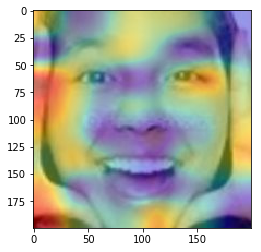

In [20]:
create_cam('FirstTake/baseline_agegenderethnicity.h5', 'FirstTake/9_1_4_20170103213057382.jpg.chip.jpg', 'ethnicity')

In [4]:
import random
import os

faces_paths = os.listdir('UTKFace/UTKFace/')

# Gender

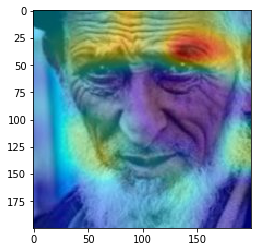

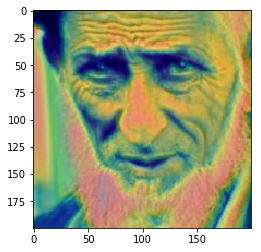

In [47]:
a = random.randint(0, len(faces_paths))
create_cam('FirstTake/baseline_agegenderethnicity.h5', 'UTKFace/UTKFace/'+faces_paths[a], 'gender')
create_cam('Models/hardparam3genderethnicity.h5', 'UTKFace/UTKFace/'+faces_paths[a], 'gender')

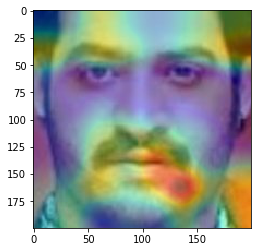

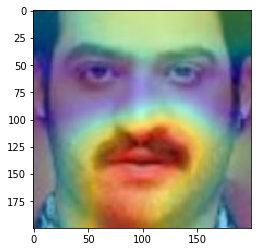

In [41]:
a = random.randint(0, len(faces_paths))
create_cam('FirstTake/baseline_agegenderethnicity.h5', 'UTKFace/UTKFace/'+faces_paths[a], 'gender')
create_cam('Models/prop3_genderethnicity.h5', 'UTKFace/UTKFace/'+faces_paths[a], 'gender')

# Ethnicity

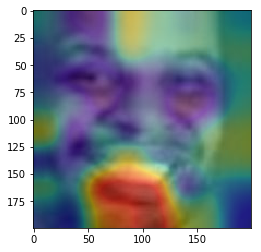

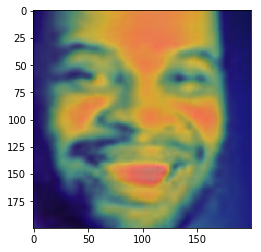

In [50]:
a = random.randint(0, len(faces_paths))
create_cam('FirstTake/baseline_agegenderethnicity.h5', 'UTKFace/UTKFace/'+faces_paths[a], 'ethnicity')
create_cam('Models/hardparam3genderethnicity.h5', 'UTKFace/UTKFace/'+faces_paths[a], 'ethnicity')

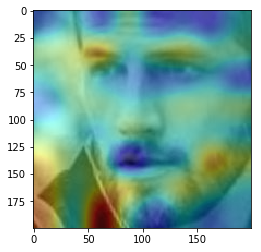

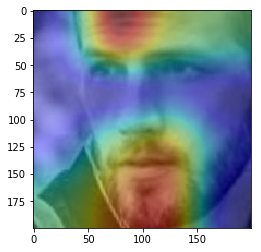

In [46]:
a = random.randint(0, len(faces_paths))
create_cam('FirstTake/baseline_agegenderethnicity.h5', 'UTKFace/UTKFace/'+faces_paths[a], 'ethnicity')
create_cam('Models/prop3_genderethnicity.h5', 'UTKFace/UTKFace/'+faces_paths[a], 'ethnicity')